<a href="https://colab.research.google.com/github/Kkarthik23540/basic-calculator/blob/main/stress_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#loading the dataset using pandas
train = pd.read_csv('/content/SaYoPillow.csv')

In [4]:
print(train.columns)  # Check column names

Index(['sr', 'rr', 'bt', 'lm', 'bo', 'em', 'nhs', 'hr', 'sl'], dtype='object')


In [5]:
#shape of the dataset which gives the number of rows and columns
print("the shape of the dataset is:",train.shape)


the shape of the dataset is: (630, 9)


In [6]:
#finding max and min values of each column
min_value = train.min()
max_value = train.max()
print("the max and min values in each column is\n")
range_diff = pd.DataFrame({'Min': min_value, 'Max': max_value})
print(range_diff)

the max and min values in each column is

      Min    Max
sr   45.0  100.0
rr   16.0   30.0
bt   85.0   99.0
lm    4.0   19.0
bo   82.0   97.0
em   60.0  105.0
nhs   0.0    9.0
hr   50.0   85.0
sl    0.0    4.0


In [7]:
train

,sr,rr,bt,lm,bo,em,nhs,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [8]:
#information about the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   bt      630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   em      630 non-null    float64
 6   nhs     630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [9]:
# sr - snoring range, rr - respiration rate, bt - body temperature, lm - limb movement rate, bo - blood oxygen,em - eye movement,nhs - number of hours sleep,hr - heart rate, sl - 0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high

In [10]:
# Renaming the columns from original dataset
train.rename(columns={"sr": "Snoring Range", "rr" : "Respiration Rate", "bt" : "Body Temperature", 'lm' : "Limb Movement Rate", "bo" : "Blood Oxygen", "em" : "Eye Movement", "nhs" : "Number Of Hours Sleep", "hr": "Heart Rate", "sl": "Stress Level"}, inplace=True)

In [11]:
train

,Snoring Range,Respiration Rate,Body Temperature,Limb Movement Rate,Blood Oxygen,Eye Movement,Number Of Hours Sleep,Heart Rate,Stress Level
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [12]:
#unique values in the column
train['Snoring Range'].unique()

array([ 93.8  ,  91.64 ,  60.   ,  85.76 ,  48.12 ,  56.88 ,  47.   ,
        50.   ,  45.28 ,  55.52 ,  73.44 ,  59.28 ,  48.6  ,  96.288,
        87.8  ,  52.32 ,  52.64 ,  86.24 ,  81.56 ,  63.68 ,  77.6  ,
        77.28 ,  69.76 ,  88.04 ,  89.96 ,  53.68 ,  78.56 ,  50.96 ,
        94.76 ,  62.08 ,  49.12 ,  96.256,  47.68 ,  99.904,  86.72 ,
        48.48 ,  98.528,  46.12 ,  98.72 ,  60.96 ,  65.6  ,  75.36 ,
        49.28 ,  73.28 ,  98.912,  62.88 ,  97.664,  56.72 ,  96.576,
        49.6  ,  53.6  ,  93.2  ,  46.84 ,  56.08 ,  75.68 ,  97.536,
        92.84 ,  87.56 ,  58.48 ,  98.336,  81.08 ,  46.6  ,  61.6  ,
        96.448,  50.24 ,  49.92 ,  60.48 ,  99.136,  48.28 ,  50.48 ,
        96.192,  57.68 ,  45.16 ,  48.68 ,  98.016,  96.8  ,  56.48 ,
        90.08 ,  96.   ,  50.64 ,  50.56 ,  53.92 ,  96.672,  68.32 ,
        54.88 ,  52.4  ,  51.6  ,  92.48 ,  98.24 ,  65.12 ,  86.6  ,
        68.   ,  99.808,  45.2  ,  63.2  ,  98.272,  75.2  ,  76.96 ,
        80.   ,  99.

In [13]:
train['Heart Rate'].unique()

array([74.2 , 72.76, 60.  , 68.84, 53.12, 58.44, 52.  , 55.  , 50.28,
       57.76, 63.36, 59.64, 53.6 , 75.72, 70.2 , 56.16, 56.32, 69.16,
       66.04, 60.92, 64.4 , 64.32, 62.44, 70.36, 71.64, 56.84, 64.64,
       55.48, 74.84, 60.52, 54.12, 75.64, 52.68, 84.76, 69.48, 53.48,
       81.32, 51.12, 81.8 , 60.24, 61.4 , 63.84, 54.28, 63.32, 82.28,
       60.72, 79.16, 58.36, 76.44, 54.6 , 56.8 , 73.8 , 51.84, 58.04,
       63.92, 78.84, 73.56, 70.04, 59.24, 80.84, 65.72, 51.6 , 60.4 ,
       76.12, 55.12, 54.92, 60.12, 82.84, 53.28, 55.24, 75.48, 58.84,
       50.16, 53.68, 80.04, 77.  , 58.24, 71.72, 75.  , 55.32, 55.28,
       56.96, 76.68, 62.08, 57.44, 56.2 , 55.8 , 73.32, 80.6 , 61.28,
       69.4 , 62.  , 84.52, 50.2 , 60.8 , 80.68, 63.8 , 64.24, 65.  ,
       84.04, 78.04, 50.04, 78.44, 56.76, 60.36, 60.56, 64.8 , 77.4 ,
       57.2 , 62.24, 76.52, 52.44, 72.04, 61.72, 79.8 , 62.16, 64.  ,
       54.52, 57.48, 57.64, 71.88, 78.28, 59.04, 67.4 , 80.28, 80.52,
       61.44, 58.6 ,

In [14]:
train['Blood Oxygen'].unique()

array([89.84 , 89.552, 95.   , 88.768, 96.248, 94.064, 95.8  , 97.   ,
       95.112, 93.656, 91.344, 94.784, 96.44 , 82.432, 89.04 , 92.696,
       92.792, 88.832, 88.208, 90.368, 91.76 , 91.728, 90.976, 89.072,
       89.328, 93.104, 91.856, 92.288, 89.968, 90.208, 96.648, 82.384,
       96.072, 87.856, 90.   , 88.896, 96.392, 85.792, 95.448, 86.08 ,
       90.096, 90.56 , 91.536, 96.712, 91.328, 86.368, 90.288, 84.496,
       94.016, 82.864, 96.84 , 93.08 , 89.76 , 95.736, 93.824, 91.568,
       84.304, 89.712, 89.008, 94.544, 85.504, 88.144, 95.64 , 90.16 ,
       82.672, 92.072, 96.968, 90.048, 86.704, 96.312, 92.144, 82.288,
       94.304, 95.064, 96.472, 85.024, 83.2  , 93.944, 89.344, 82.   ,
       92.192, 92.168, 93.176, 83.008, 90.832, 93.464, 92.72 , 92.48 ,
       89.664, 85.36 , 90.512, 88.88 , 90.8  , 87.712, 95.08 , 90.32 ,
       85.408, 91.52 , 91.696, 88.   , 87.424, 83.824, 95.016, 84.064,
       93.056, 90.144, 90.224, 91.92 , 83.44 , 93.32 , 90.896, 82.912,
      

In [15]:
#unique values in the last column(stress level)
train['Stress Level'].unique()

array([3, 1, 0, 2, 4])

In [16]:
#count of each stress level in the dataset
train['Stress Level'].value_counts()

,count
Stress Level,
3,126
1,126
0,126
2,126
4,126


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Snoring Range          630 non-null    float64
 1   Respiration Rate       630 non-null    float64
 2   Body Temperature       630 non-null    float64
 3   Limb Movement Rate     630 non-null    float64
 4   Blood Oxygen           630 non-null    float64
 5   Eye Movement           630 non-null    float64
 6   Number Of Hours Sleep  630 non-null    float64
 7   Heart Rate             630 non-null    float64
 8   Stress Level           630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


np.float64(0.11393461423002128)

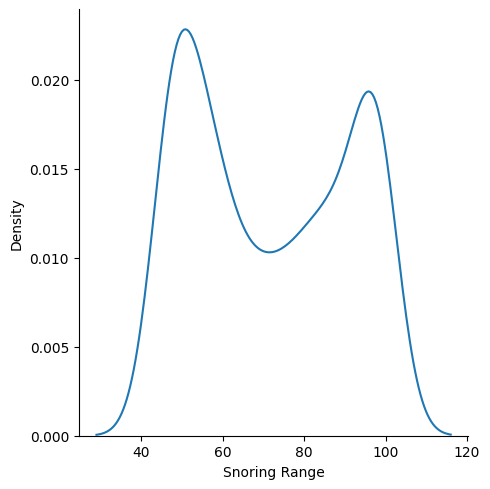

In [18]:
sns.displot(train["Snoring Range"],kind='kde')
train['Snoring Range'].skew()

np.float64(0.45586254719845326)

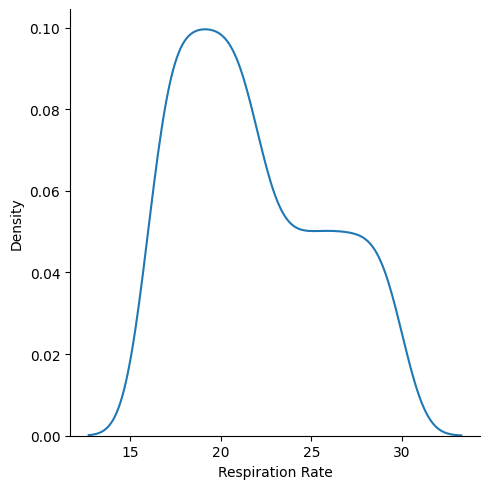

In [19]:
sns.displot(train['Respiration Rate'],kind='kde')
train['Respiration Rate'].skew()

np.float64(-0.2857511600166689)

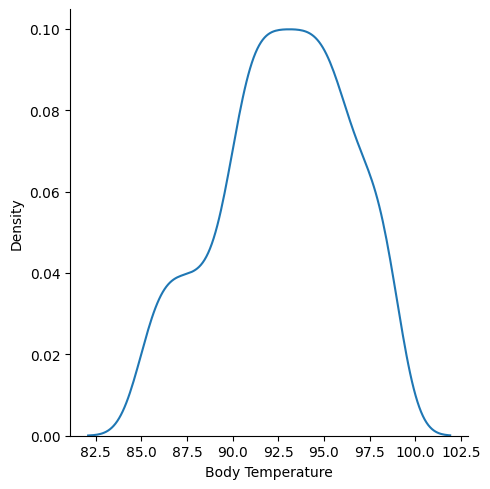

In [20]:
sns.displot(train["Body Temperature"], kind='kde')
train['Body Temperature'].skew()

np.float64(0.16266707843026826)

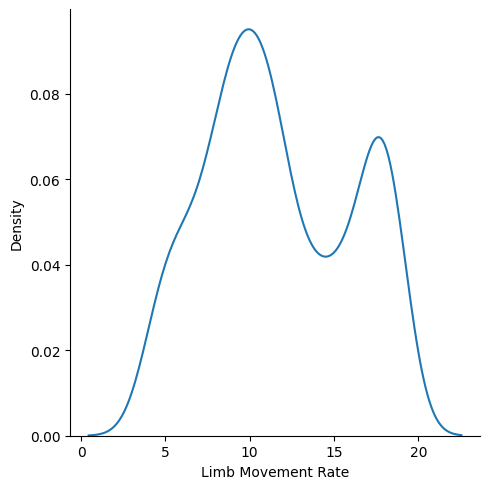

In [21]:
sns.displot(train["Limb Movement Rate"],kind='kde')
train['Limb Movement Rate'].skew()

np.float64(-0.3606553282300263)

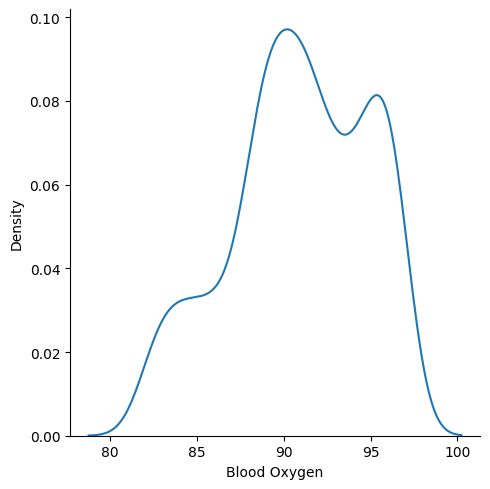

In [22]:
sns.displot(train["Blood Oxygen"], kind='kde')
train['Blood Oxygen'].skew()

np.float64(-0.5738786598112939)

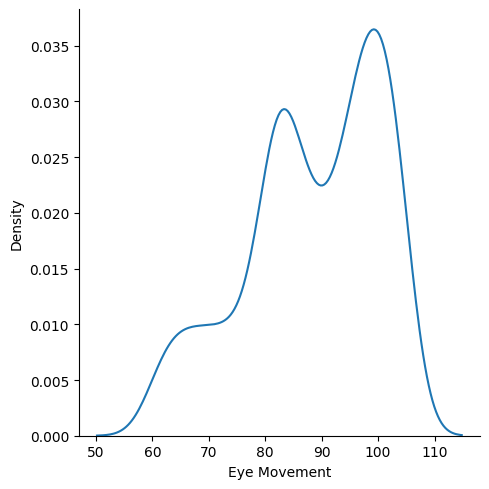

In [23]:
sns.displot(train["Eye Movement"], kind='kde')
train['Eye Movement'].skew()

np.float64(0.17511258649719963)

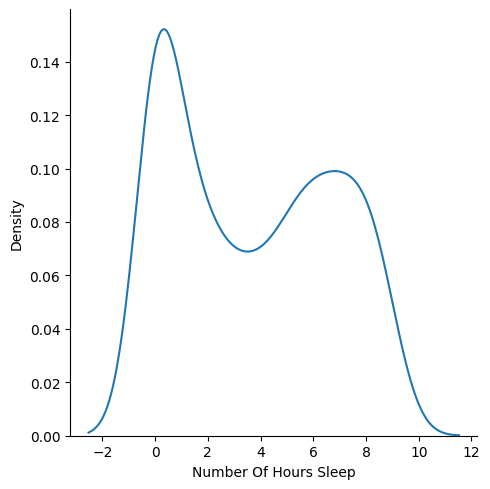

In [24]:
sns.displot(train["Number Of Hours Sleep"], kind='kde')
train['Number Of Hours Sleep'].skew()

np.float64(0.4558625471984541)

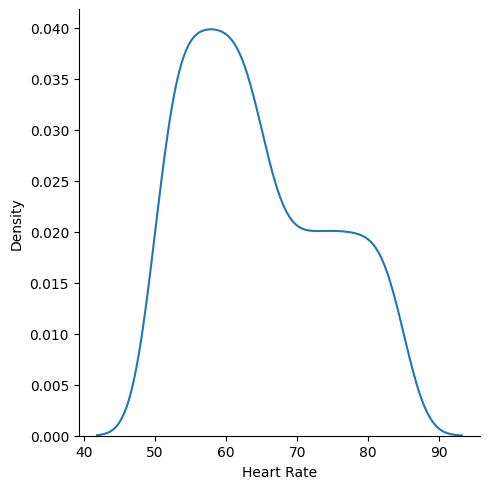

In [25]:
sns.displot(train["Heart Rate"],kind='kde')
train['Heart Rate'].skew()

In [26]:
train[train['Stress Level']==1].shape

(126, 9)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Snoring Range          630 non-null    float64
 1   Respiration Rate       630 non-null    float64
 2   Body Temperature       630 non-null    float64
 3   Limb Movement Rate     630 non-null    float64
 4   Blood Oxygen           630 non-null    float64
 5   Eye Movement           630 non-null    float64
 6   Number Of Hours Sleep  630 non-null    float64
 7   Heart Rate             630 non-null    float64
 8   Stress Level           630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [28]:
train.head()

,Snoring Range,Respiration Rate,Body Temperature,Limb Movement Rate,Blood Oxygen,Eye Movement,Number Of Hours Sleep,Heart Rate,Stress Level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


<Axes: xlabel='Stress Level', ylabel='Blood Oxygen'>

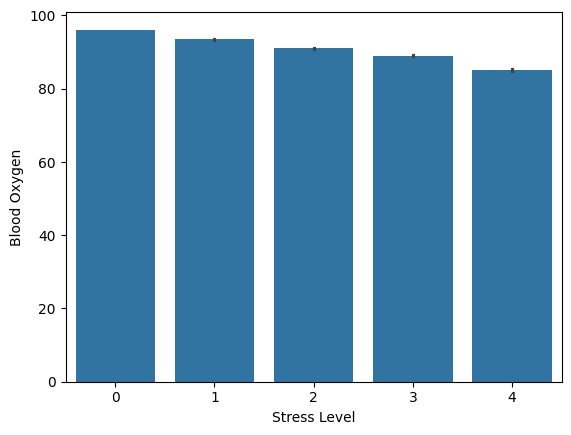

In [29]:
sns.barplot(x='Stress Level', y='Blood Oxygen', data=train)

<Axes: xlabel='Stress Level', ylabel='Heart Rate'>

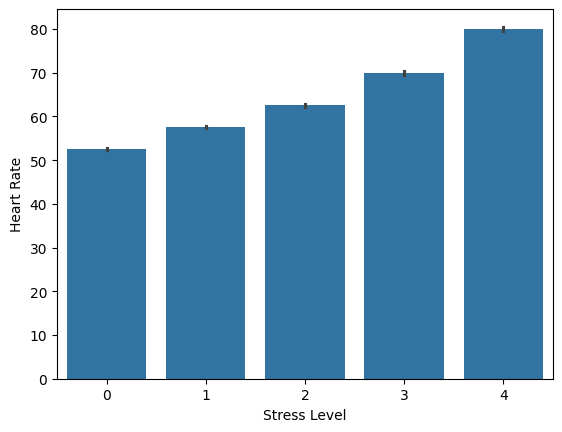

In [30]:
sns.barplot(x='Stress Level',y='Heart Rate',data=train)

In [31]:
train.head()

,Snoring Range,Respiration Rate,Body Temperature,Limb Movement Rate,Blood Oxygen,Eye Movement,Number Of Hours Sleep,Heart Rate,Stress Level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [32]:
#dropping the column of stress level
X = train.drop(['Stress Level'], axis=1).values
y = train['Stress Level'].values

In [33]:
X

array([[ 93.8  ,  25.68 ,  91.84 , ...,  99.6  ,   1.84 ,  74.2  ],
       [ 91.64 ,  25.104,  91.552, ...,  98.88 ,   1.552,  72.76 ],
       [ 60.   ,  20.   ,  96.   , ...,  85.   ,   7.   ,  60.   ],
       ...,
       [ 97.504,  27.504,  86.88 , ..., 101.88 ,   0.   ,  78.76 ],
       [ 58.64 ,  19.728,  95.728, ...,  84.32 ,   6.728,  59.32 ],
       [ 73.92 ,  21.392,  93.392, ...,  91.96 ,   4.088,  63.48 ]])

In [34]:
y

array([3, 3, 1, 3, 0, 1, 0, 0, 0, 1, 2, 1, 0, 4, 3, 1, 1, 3, 3, 2, 2, 2,
       2, 3, 3, 1, 2, 1, 3, 2, 0, 4, 0, 4, 2, 3, 0, 4, 0, 4, 2, 2, 2, 0,
       2, 4, 2, 4, 1, 4, 0, 1, 3, 0, 1, 2, 4, 3, 3, 1, 4, 3, 0, 2, 4, 1,
       0, 2, 4, 0, 1, 4, 1, 0, 0, 4, 4, 1, 3, 4, 1, 1, 1, 4, 2, 1, 1, 1,
       3, 4, 2, 3, 2, 4, 0, 2, 4, 2, 2, 3, 4, 4, 0, 4, 1, 2, 2, 2, 4, 1,
       2, 4, 0, 3, 2, 4, 2, 2, 0, 1, 1, 3, 4, 1, 3, 4, 4, 2, 1, 4, 2, 0,
       4, 3, 1, 0, 0, 2, 4, 0, 2, 3, 2, 0, 2, 0, 0, 0, 0, 1, 3, 0, 4, 4,
       0, 2, 3, 2, 4, 4, 4, 2, 1, 2, 4, 2, 0, 0, 4, 4, 1, 2, 2, 1, 1, 1,
       1, 4, 3, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 4, 3, 4, 0, 0, 0,
       2, 3, 0, 0, 0, 2, 4, 0, 2, 4, 1, 1, 1, 3, 0, 0, 3, 3, 0, 2, 2, 2,
       1, 4, 0, 1, 3, 4, 2, 1, 4, 0, 3, 4, 1, 3, 0, 0, 3, 4, 3, 1, 4, 3,
       3, 4, 3, 0, 3, 2, 3, 3, 1, 4, 2, 3, 1, 3, 2, 3, 4, 2, 4, 3, 2, 0,
       0, 1, 2, 3, 2, 2, 4, 4, 1, 0, 4, 1, 2, 3, 4, 3, 3, 3, 0, 3, 0, 1,
       3, 3, 3, 2, 4, 0, 4, 0, 4, 0, 2, 1, 2, 1, 3,

In [35]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
print(X_train.shape)
print(X_test.shape)

(441, 8)
(189, 8)


In [36]:
X_train

array([[ 88.28 ,  24.208,  91.104, ...,  97.76 ,   1.104,  70.52 ],
       [ 45.72 ,  16.288,  96.432, ...,  62.88 ,   7.288,  50.72 ],
       [ 88.04 ,  24.144,  91.072, ...,  97.68 ,   1.072,  70.36 ],
       ...,
       [ 96.128,  26.128,  85.16 , ..., 100.16 ,   0.   ,  75.32 ],
       [ 92.36 ,  25.296,  91.648, ...,  99.12 ,   1.648,  73.24 ],
       [ 61.92 ,  20.192,  92.192, ...,  85.96 ,   2.288,  60.48 ]])

In [37]:
X_test

array([[ 47.68 ,  17.072,  97.608, ...,  70.72 ,   8.072,  52.68 ],
       [ 92.24 ,  25.264,  91.632, ...,  99.08 ,   1.632,  73.16 ],
       [ 89.24 ,  24.464,  91.232, ...,  98.08 ,   1.232,  71.16 ],
       ...,
       [ 49.56 ,  17.824,  98.736, ...,  78.24 ,   8.824,  54.56 ],
       [ 95.   ,  26.   ,  92.   , ..., 100.   ,   2.   ,  75.   ],
       [ 51.12 ,  18.224,  94.224, ...,  80.56 ,   5.224,  55.56 ]])

In [38]:
y_train

array([3, 0, 3, 3, 2, 4, 1, 1, 4, 2, 3, 0, 0, 4, 4, 0, 2, 0, 3, 2, 2, 2,
       1, 4, 0, 3, 1, 4, 2, 0, 4, 3, 4, 2, 0, 3, 0, 4, 3, 1, 4, 4, 2, 3,
       4, 1, 3, 2, 4, 1, 4, 4, 3, 3, 1, 4, 4, 3, 0, 0, 0, 2, 0, 2, 4, 0,
       1, 2, 1, 1, 3, 1, 4, 2, 0, 2, 1, 3, 3, 1, 4, 1, 0, 3, 2, 1, 3, 1,
       3, 1, 4, 0, 2, 4, 2, 4, 2, 3, 1, 1, 4, 0, 0, 0, 2, 2, 0, 1, 1, 2,
       1, 4, 1, 4, 1, 2, 3, 1, 4, 2, 3, 0, 3, 1, 1, 1, 2, 0, 3, 4, 4, 4,
       3, 3, 3, 3, 2, 1, 1, 2, 1, 2, 4, 1, 3, 3, 0, 4, 0, 3, 4, 4, 1, 4,
       3, 2, 0, 3, 2, 2, 1, 2, 4, 0, 3, 3, 4, 3, 4, 0, 3, 1, 4, 0, 3, 0,
       2, 2, 1, 2, 2, 4, 0, 0, 0, 2, 0, 1, 1, 0, 4, 3, 0, 2, 0, 0, 0, 3,
       0, 4, 0, 1, 2, 0, 3, 1, 2, 1, 4, 4, 0, 0, 0, 4, 0, 4, 2, 3, 4, 3,
       3, 1, 2, 0, 0, 0, 4, 2, 1, 3, 4, 1, 2, 1, 2, 1, 1, 0, 0, 0, 4, 4,
       4, 3, 1, 1, 1, 1, 4, 0, 4, 1, 3, 4, 0, 1, 4, 4, 0, 1, 1, 4, 1, 1,
       4, 0, 2, 3, 3, 2, 0, 3, 2, 1, 3, 4, 0, 1, 3, 3, 2, 3, 2, 2, 1, 2,
       2, 3, 2, 0, 2, 3, 2, 0, 2, 1, 1, 2, 4, 3, 1,

In [39]:
y_test

array([0, 3, 3, 0, 4, 2, 4, 1, 0, 4, 0, 0, 4, 3, 0, 2, 1, 2, 2, 3, 0, 3,
       1, 2, 1, 0, 1, 3, 2, 1, 4, 4, 2, 0, 2, 4, 1, 4, 3, 2, 3, 1, 2, 0,
       2, 2, 0, 3, 4, 1, 1, 4, 4, 1, 2, 0, 2, 4, 0, 0, 1, 4, 1, 3, 0, 2,
       4, 1, 1, 0, 3, 3, 1, 4, 2, 0, 3, 1, 3, 1, 0, 3, 3, 2, 4, 3, 0, 0,
       4, 4, 1, 3, 0, 4, 3, 3, 0, 2, 4, 2, 0, 3, 1, 3, 1, 0, 3, 0, 4, 0,
       4, 3, 1, 2, 4, 0, 2, 0, 1, 0, 1, 3, 4, 1, 4, 4, 3, 1, 3, 1, 2, 4,
       4, 1, 0, 3, 0, 0, 4, 4, 1, 0, 0, 0, 3, 0, 2, 2, 0, 1, 2, 2, 3, 1,
       2, 2, 0, 4, 0, 2, 0, 3, 4, 3, 4, 1, 4, 3, 4, 3, 1, 4, 3, 0, 3, 3,
       3, 3, 4, 2, 2, 4, 0, 4, 1, 1, 0, 3, 1])

In [40]:
#sklearn library for Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
rfc = RandomForestClassifier(n_estimators=60, random_state=23)

In [42]:
#fitting the model
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=60, random_state=23)

In [43]:
rfc.score(X_train,y_train)

1.0

In [44]:
#finding the Prediction and accuracy
from sklearn.metrics import accuracy_score
y_pred = rfc.predict(X_test)
print("the accuracy score is ", accuracy_score(y_test, y_pred))

the accuracy score is  0.9788359788359788


In [45]:
# evaluation of classification report
import sklearn.metrics
print("the classification report is \n")
print(sklearn.metrics.classification_report(y_test, y_pred))

the classification report is 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.97      0.97      0.97        36
           2       0.97      0.97      0.97        31
           3       1.00      0.95      0.97        40
           4       0.97      1.00      0.99        39

    accuracy                           0.98       189
   macro avg       0.98      0.98      0.98       189
weighted avg       0.98      0.98      0.98       189



In [46]:
y_pred = rfc.predict(X_test)
y_true=y_test

#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
print("the confusion matrix is \n\n",cm)

the confusion matrix is 

 [[43  0  0  0  0]
 [ 1 35  0  0  0]
 [ 0  1 30  0  0]
 [ 0  0  1 38  1]
 [ 0  0  0  0 39]]


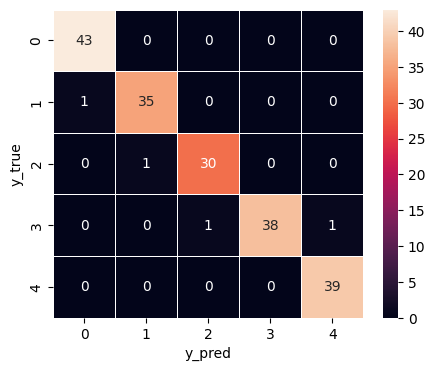

In [47]:
#plotting the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,4))
sns.heatmap(cm,annot=True,linewidths=0.7,linecolor="white",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [48]:
# Saving the model using pickle library
import pickle

try:
    pickle.dump(rfc, open('stress_detection.pkl', 'wb'))
    stress = pickle.load(open('stress_detection.pkl', 'rb'))
    print("Successfully saved the model in stress_detection.pkl")
except Exception as e:
    print(f"Failed: {e}")

Successfully saved the model in stress_detection.pkl
